# • Hoeffding's Inequality

### Run a computer simulation for flipping 1,000 virtual fair coins. Flip each coin independently 10 times. Focus on 3 coins as follows: $c_1$ is the first coin flipped, $c_{rand}$ is a coin chosen randomly from the 1,000, and $c_{min}$ is the coin which had the minimum frequency of heads (pick the earlier one in case of a tie). Let $ν_1$, $ν_{rand}$, and $ν_{min}$ be the fraction of heads obtained for the 3 respective coins out of the 10 tosses. Run the experiment 100,000 times in order to get a full distribution of $ν_1$, $ν_{rand}$, and $ν_{min}$ (note that crand and cmin will change from run to run).

# Let's create a function that flips a 1000 coins 10 times

In [1]:
import numpy as np

In [2]:
n = 10   # number of of flips
N = 1000 # number of coins
p = 0.5  # fair coin

flip_onethousand_coins_ten_times = lambda n, p, N: np.random.binomial(n, p, size=N)

In [3]:
flips = flip_onethousand_coins_ten_times(n, p, N)

In [4]:
c_1    = flips[0]                # first coin flipped
c_rand = np.random.choice(flips) # random coin flipped
c_min  = flips.min()             # coin with minimum frequency

In [5]:
c_1/n

0.59999999999999998

In [6]:
print("c1 = {}".format(c_1))
print("crand = {}".format(c_rand))
print("cmin = {}".format(c_min))

c1 = 6
crand = 5
cmin = 0


# Let's run this function 100,000 times!

In [7]:
def experiment(trials=100000):
    nu_1s, nu_rands, nu_mins = np.zeros(trials), np.zeros(trials), np.zeros(trials)
    for trial in range(trials):
        flips = flip_onethousand_coins_ten_times(n, p, N)
        c_1    = flips[0]                # first coin flipped
        c_rand = np.random.choice(flips) # random coin flipped
        c_min  = flips.min()             # coin with minimum frequency
        nu_1s[trial]    = c_1 / n
        nu_rands[trial] = c_rand / n
        nu_mins[trial]  = c_min / n
    return (nu_1s, nu_rands, nu_mins)
    

In [8]:
nu_1s, nu_rands, nu_mins = experiment()

In [9]:
len(nu_1s)

100000

# 1. The average value of $ν_{min}$ is closest to:

In [10]:
avg_nu_min = nu_mins.mean()
print("average value of nu_min is: {}".format(avg_nu_min))

average value of nu_min is: 0.037745


### The average $\nu_{min}$ is closest to 0.01

# 2. Which coin(s) has a distribution of $ν$ that satisfies the (single-bin) Hoeffding Inequality?

In [11]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

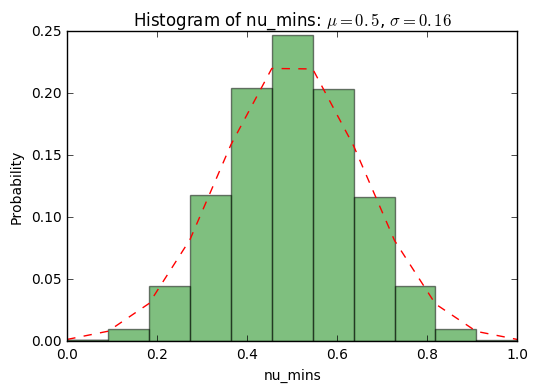

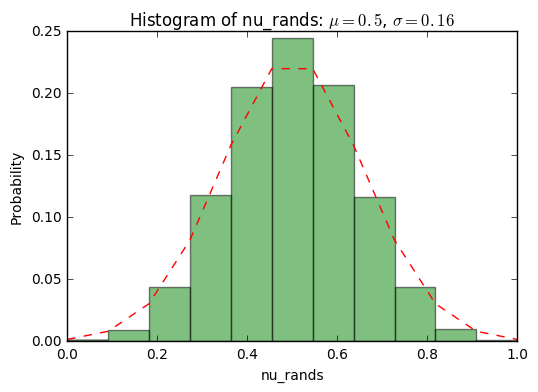

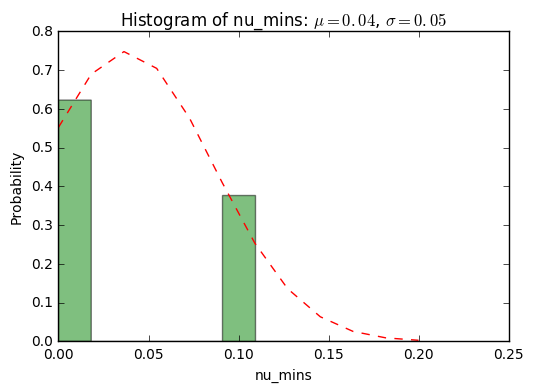

In [12]:
# %load http://matplotlib.org/mpl_examples/statistics/histogram_demo_features.py
"""
Demo of the histogram (hist) function with a few features.

In addition to the basic histogram, this demo shows a few optional features:

    * Setting the number of data bins
    * The ``normed`` flag, which normalizes bin heights so that the integral of
      the histogram is 1. The resulting histogram is a probability density.
    * Setting the face color of the bars
    * Setting the opacity (alpha value).

"""
data = [nu_1s, nu_rands, nu_mins]
titles = ["nu_mins", "nu_rands", "nu_mins"]
for i in range(3):
    plt.figure(i)
    # example data
    x = sorted(data[i]) # distribution
    mu = np.mean(x)     # mean of distribution
    sigma = np.std(x)   # standard deviation of distribution
    

    num_bins = 11
    # the histogram of the data
    weights = np.ones_like(x)/len(x)
    n, bins, patches = plt.hist(x, weights=weights, bins=num_bins, normed=False, facecolor='green', alpha=0.5)
    y = mlab.normpdf(bins, mu, sigma) / num_bins
    
    plt.plot(bins, y, 'r--')
    plt.xlabel('{}'.format(titles[i]))
    plt.ylabel('Probability')
    plt.title(r'Histogram of {}: $\mu={}$, $\sigma={}$'.format(titles[i], 
                                                               round(mu, 2), 
                                                               round(sigma,2)
                                                              )
             )

    # Tweak spacing to prevent clipping of ylabel
    plt.subplots_adjust(left=0.15)
plt.show()

### Since the Hoeffding Inequality is applicable to binomial distributions (flipping coins), the first two graphs exhibit this distribution.

### Hence $c_{1}$ and $c_{rand}$ satisfies the (single-bin) Hoeffding Inequality.

<br><br>

# • Error and Noise

### Consider the bin model for a hypothesis $h$ that makes an error with probability $\mu$ in approximating a deterministic target function $f$ (both $h$ and $f$ are binary functions). If we use the same h to approximate a noisy version of $f$ given by:

\begin{eqnarray}
    P(y \mid x) = \begin{cases}
                                        \lambda, 
                                           & \quad \text{if } y = f(x),\\
                                        1-\lambda, & \quad \text{if } y \neq f(x),\\
                                    \end{cases}
\end{eqnarray}

### 3. What is the probability of error that h makes in approximating y? Hint: Two wrongs can make a right!

$P(h(x)\neq y)$

$h(x)\neq y \to (y \neq f(x) \cap h(x) = f(x)) \cup (y = f(x) \cap h(x) \neq f(x))$

$P(y \neq f(x) \cap h(x) = f(x)) \cup (y = f(x) \cap h(x) \neq f(x))$

$P(y \neq f(x) \cap h(x) = f(x) ) + P(y = f(x) \cap h(x) \neq f(x) )$

$P(y \neq f(x))P(h(x) = f(x)) + P(y = f(x))P(h(x) \neq f(x))$

$(1-\lambda)(1 - \mu)+ \lambda\mu $

### 4. At what value of λ will the performance of h be independent of µ?

$h(x)\neq y \perp \mu \to  P(h(x)\neq y) = \frac{1}{2}$

$(1-\lambda)(1 - \mu)+ \lambda\mu = \frac{1}{2}$

$2\lambda\mu -\lambda - \mu + 1 = \frac{1}{2}$

$2\lambda(\mu - \frac{1}{2}) = \mu -  \frac{1}{2}$

$2\lambda = 1$

$\lambda = \frac{1}{2}$

# • Linear Regression


### In these problems, we will explore how Linear Regression for classification works. As with the Perceptron Learning Algorithm in Homework # 1, you will create your own target function $f$ and data set $D$. Take d = 2 so you can visualize the problem, and assume $X = [−1, 1] × [−1, 1]$ with uniform probability of picking each $x ∈ X$ . In each run, choose a random line in the plane as your target function $f$ (do this by taking two random, uniformly distributed points in $[−1, 1] × [−1, 1]$ and taking the line passing through them), where one side of the line maps to $+1 $and the other maps to $−1$. Choose the inputs $x_n$ of the data set as random points (uniformly in $X$ ), and evaluate the target function on each $x_n$ to get the corresponding output $y_n$.

### 5. Take $N = 100$. Use Linear Regression to find $g$ and evaluate $E_{in}$, the fraction of in-sample points which got classified incorrectly. Repeat the experiment $1000$ times and take the average (keep the $g$’s as they will be used again in Problem 6). Which of the following values is closest to the average $E_{in}$? (Closest is the option that makes the expression $|your\ answer −given\ option|$ closest to $0$. Use this definition of closest here and throughout.)

# Let's make our random $f(x)$ line function!

In [13]:
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv

In [99]:
def make_weights_for_fx(points):
    """Creates the d=2 weight vector for f(x) from 
       the random two points selected.
       
       Args:
       
       points: 2 x 2 array representing the two random points
       
       Returns:
       A tuple 2-items tuple representing (intercept, slope)
    """
    
    lr = LinearRegression()
    x_vector = points[:, 0].reshape(-1,1)
    y_vector = points[:, 1].reshape(-1,1)
    lr.fit(x_vector, y_vector)
    w0_f = lr.intercept_[0]
    w1_f = lr.coef_[0][0]
    return np.array((w0_f, w1_f))

# Now let's make a function that creates some random points and labels!

In [94]:
def create_random_points_and_labels(N, weights_fx):
    """Creates N random points in the space of  [−1, 1] × [−1, 1]
       and them labels them based on what side of of the line they
       land on based on weights_fx.
       
    Args:
    
        N: Number of random points
        weights_fx:  tuple representing (intercept, slope) of f(x)
    
    Returns:
    
        A tuple of the following items:
            X: an N X D array representing the coordinates of of the points
            Y: an N X 1 array representing +1 or -1 depending on which side of
               the points land in relation to fx 
    """
    
    X = np.random.uniform(-1,1,(N,2))
    Y = X[:, 1] - X[:, 0] * weights_fx[1] - weights_fx[0] >= 0
    Y = np.where(Y, 1, -1)
    return(X, Y)

# Now for our linear regression function to create $g(x)$!

In [100]:
two_random_points_for_line = np.random.uniform(-1, 1, (2, 2))    
w_fx = make_weights_for_fx(two_random_points_for_line)
w_fx

array([-1.13163955, -1.56739518])

In [336]:
def linear_regression(N=100):
    two_random_points_for_line = np.random.uniform(-1, 1, (2, 2))    
    w_fx = make_weights_for_fx(two_random_points_for_line)
    X, Y = create_random_points_and_labels(N, w_fx)
    
    X_new = np.hstack((np.ones((N, 1)), X))
    Y_new = np.expand_dims(Y, 1) # need to change array into vector for calcs to work out!
    
    w_pseudo = np.dot(inv(np.dot(X_new.T, X_new)), X_new.T)
    w_gx_new = np.dot(w_pseudo, Y_new)
    
    w_gx = -w_gx_new[:2]/w_gx_new[2] # change d + 1 vector into d vector for plotting
    
    Y_hat = np.where(np.dot(X_new, w_gx_new) > 0, 1, -1)
    E_in = np.mean(Y_hat != np.expand_dims(Y,1)) # need to change array into vector for calcs to work out!
    return(w_fx, w_gx, X, Y, w_gx_new, X_new, Y_new, E_in)

# Ok let's create a plot function to inspect our linear regression classifer compared to $f(x)$


In [328]:
def plot_points_and_lines(weights_fx, weights_gx, X, Y, E_in):
    """Creates the plot of f(x) and g(x) lines along with labeled points
    
       Args:
        weights_fx:  tuple representing (intercept, slope) of f(x)
        weights_gx:  tuple representing (intercept, slope) of g(x)
        X: an N X D array representing the coordinates of of the points
        Y: an N X 1 array representing +1 or -1
        
    """
    
    line = np.linspace(-1, 1, 1001) # points from 0-1000
    
    plt.plot(line, line * weights_fx[1] + weights_fx[0], label="f(x)") # makes f(x) line
    plt.plot(line, line * weights_gx[1]+  weights_gx[0], label="g(x)") # makes g(x) line
    
    plt.ylim(-1, 1)
    plt.xlim(-1, 1)
    plt.title("E_in = {}".format(round(E_in, 2)))
    
    plt.scatter(X[:, 0][Y==1],  X[:, 1][Y== 1], marker="+", c=("r"), label="+")
    plt.scatter(X[:, 0][Y==-1], X[:, 1][Y==-1], marker="_", c=("b"), label="-")# colored based on Y = +1 or -1
    plt.legend(loc="best")

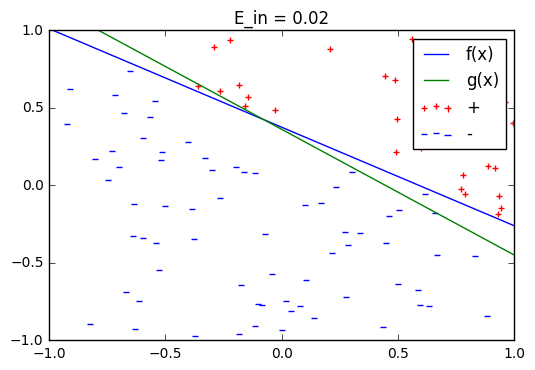

In [337]:
w_fx, w_gx, X, Y, w_gx_new, X_new, Y_new, E_in = linear_regression()

plot_points_and_lines(w_fx, w_gx, X, Y, E_in)

# Now we create a function that combines  the previous functions
# And runs them multiple times to get an average $E_{in}$.

In [338]:
def experiment(N=100, trials = 1000):
    """ Calculates Linear regression algorithm multiple times and gets
        the average of Ein:
        
        args: 
        N: number of data points
        trials: number of trials that are averaged 
        """
    
    w_fs  = []
    w_gs  = []
    E_ins = np.zeros(trials)
    
    for trial in range(trials):
        w_fx, w_gx, X, Y, w_gx_new, X_new, Y_new, E_in = linear_regression(N)
        w_fs.append(w_fx)
        w_gs.append(w_gx_new)
        E_ins[trial] = E_in

    return(w_fs, w_gs, np.mean(E_ins))

In [339]:
w_fs, w_gs, E_in = experiment()

In [340]:
print("The average E_in after 1000 trials = {}".format(E_in))

The average E_in after 1000 trials = 0.03785


# The average $E_{in}$ after 1000 trials $\approx$ 0.04

# 6. Now, generate 1000 fresh points and use them to estimate the out-of-sample error $E_{out}$ of g that you got in Problem 5 (number of misclassified out-of-sample points / total number of out-of-sample points). Again, run the experiment 1000 times and take the average. Which value is closest to the average $E_{out}$?

In [354]:
def experiment2(w_fs, w_gs, N = 25):
    E_outs = np.zeros(len(w_fs))

    for i, (w_fx, w_gx_new) in enumerate(zip(w_fs, w_gs)):
        X, Y = create_random_points_and_labels(N, w_fx)
        X_new = np.hstack((np.ones((N, 1)), X))
        Y_new = np.expand_dims(Y, 1) # need to change array into vector for calcs to work out!
        Y_hat = np.where(np.dot(X_new, w_gx_new) > 0, 1, -1)
        E_out = np.mean(Y_hat != np.expand_dims(Y,1))
        E_outs[i] = E_out
        
    
    return np.mean(E_outs)    

In [359]:
Avg_E_out = experiment2(w_fs, w_gs)
print("For 1000 trials of fresh 1000 points average E_out is = {}".format(round(Avg_E_out, 3)))

For 1000 trials of fresh 1000 points average E_out is = 0.046


# For 1000 trials of fresh 1000 points average $E_{out}\approx$ 0.046

# 7. Now, take $N = 10$. After finding the weights using Linear Regression, use them as a vector of initial weights for the Perceptron Learning Algorithm. Run PLA until it converges to a final vector of weights that completely separates all the in-sample points. Among the choices below, what is the closest value to the average number of iterations (over 1000 runs) that PLA takes to converge? (When implementing PLA, have the algorithm choose a point randomly from the set of misclassified points at each iteration)

# Now for our PLA function to create another g(x)!

In [450]:
def make_weights_for_gx(X, Y, w_gx_new):
    """Creates the d=2 weight vector for gx based on using PLA.
       
    Args:
       
        X: an N X D array representing the coordinates of of the points
        Y: an N X 1 array representing +1 or -1
       
       Returns:
           
           A tuple of the following items:
            w0_g: represents intercept of g(x)
            w1_g: represents slope of g(x)
            n: the number of iterations needed for convergence
               we will use that to answer the hw questions
    """
    
    converged = False
    n = 0
    w_g = w_gx_new # from Linear Regression algorithm
    
    while not converged:
        converged = True
        
        # while the homework asks to choose a random misclassified point
        # a for-loop essentially does the same job and doesn't affect 
        # the performance of the algorithm. In other texts the algorithm
        # is stated as a for-loop
        
        for i in range(len(X)):
            Xi = np.expand_dims(np.hstack((1,X[i])), 0)
            if Y[i] * np.dot(Xi, w_g) < 0: # misclassified point?
                n += 1 
                w_g += Y[i]*Xi.T

                converged = False
             
    return n

In [454]:
def experiment3(trials=1000, N=10):
    iterations_over_trials = np.zeros(trials)
    for trial in range(trials):
        w_fx, w_gx, X, Y, w_gx_new, X_new, Y_new, E_in = linear_regression(N)
        iterations = make_weights_for_gx(X, Y, w_gx_new)
        iterations_over_trials[trial] = iterations
        
    return np.mean(iterations_over_trials)

In [466]:
avg_iterations_PLA = experiment3()

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in true_divide


In [467]:
print("""Average number for iterations to converge for PLA with 
         10 points using w_gx from linear regression as seed 
         with 1000 trials is: {}""".format(round(avg_iterations_PLA)))

Average number for iterations to converge for PLA with 
         10 points using w_gx from linear regression as seed 
         with 1000 trials is: 5.0


# Average number for iterations to converge for PLA with $N = 10$ points using weights from linear regression as seed with 1000 runs $\approx$ 5.0

<br> <br>

# • Nonlinear Transformation


# In these problems, we again apply Linear Regression for classification. Consider the target function: $f(x_1, x_2) = sign(x_{1}^2 + x_{2}^2 − 0.6)$ Generate a training set of $N = 1000$ points on $X = [−1, 1] × [−1, 1]$ with a uniform probability of picking each $x ∈ X$ . Generate simulated noise by flipping the sign of the output in a randomly selected $10\%$ subset of the generated training set.

# Now let's make a function that creates some random points and labels using the new target function!

In [527]:
def create_random_points_and_labels_new_target_function(N):
    """Creates N random points in the space of  [−1, 1] × [−1, 1]
       and them labels them based on what side of of the line they
       land on based on weights_fx.
       
    Args:
    
        N: Number of random points
        weights_fx:  tuple representing (intercept, slope) of f(x)
    
    Returns:
    
        A tuple of the following items:
            X: an N X D array representing the coordinates of of the points
            Y: an N X 1 array representing +1 or -1 depending on which side of
               the points land in relation to fx 
    """
    
    X = np.random.uniform(-1,1,(N,2))
    Y = X[:, 0]**2 + X[:, 1]**2 - 0.6 >= 0
    Y = np.where(Y, 1, -1) 
    random_idx = np.random.choice(np.arange(len(Y)), N // 10, replace=False) # make 10% noise
    Y[random_idx] = -Y[random_idx] # make 10% noise
    return(X, Y)

# Carry out Linear Regression without transformation, i.e., with feature vector:
# <center>$(1, x_1, x_2)$,</center>  
# to find the weight **$w$**. 
# What is the closest value to the classification in-sample error $E_{in}$? 
# (Run the experiment 1000 times and take the average $E_{in}$ to reduce variation in your results.)

In [541]:
def linear_regression_transformation_1(N=1000):
    X, Y = create_random_points_and_labels_new_target_function(N)
    
    X_new = np.hstack((np.ones((N, 1)), X))
    Y_new = np.expand_dims(Y, 1) # need to change array into vector for calcs to work out!
    
    w_pseudo = np.dot(inv(np.dot(X_new.T, X_new)), X_new.T)
    w_gx_new = np.dot(w_pseudo, Y_new)
        
    Y_hat = np.where(np.dot(X_new, w_gx_new) > 0, 1, -1)
    E_in = np.mean(Y_hat != np.expand_dims(Y,1)) # need to change array into vector for calcs to work out!
    return E_in

In [535]:
def experiment4(trials=1000, N=1000):
    E_ins = np.zeros(trials)
    for trial in range(trials):
        E_in = linear_regression_transformation_1(N) 
        E_ins[trial] = E_in
        
    return np.mean(E_ins)

In [536]:
Avg_E_in_transformation_1 = experiment4()


In [539]:
print("For 1000 trials of fresh 1000 points average E_in is = {}".format(round(Avg_E_in_transformation_1, 1)))

For 1000 trials of fresh 1000 points average E_in is = 0.5


# 9. Now, transform the N = 1000 training data into the following nonlinear featurevvector:
<center>$(1, x_1, x_2, x_{1}x_2, x_1^2, x_2^2)$</center>

# Find the vector $\tilde{w}$ that corresponds to the solution of Linear Regression. Which of the following hypotheses is closest to the one you find? Closest here means agrees the most with your hypothesis (has the highest probability of agreeing on a randomly selected point). Average over a few runs to make sure your answer is stable.

In [594]:
def linear_regression_transformation_2(N=1000):
    X, Y = create_random_points_and_labels_new_target_function(N)
    
    X_new = np.hstack( (np.ones((N, 1)),
                    X, 
                    (X[:, 0] * X[:, 1])[:,np.newaxis], 
                    (X[:, 0]**2)[:,np.newaxis], 
                    (X[:, 1]**2)[:,np.newaxis]))
    
    Y_new = np.expand_dims(Y, 1) # need to change array into vector for calcs to work out!
    
    w_pseudo = np.dot(inv(np.dot(X_new.T, X_new)), X_new.T)
    w_gx_new = np.dot(w_pseudo, Y_new)
        
    Y_hat = np.where(np.dot(X_new, w_gx_new) > 0, 1, -1)
    E_out = np.mean(Y_hat != np.expand_dims(Y,1)) # need to change array into vector for calcs to work out!
    return (E_out, w_gx_new)

In [597]:
w_tilde = linear_regression_transformation_2()[1]

print("w_tilde is approximately {}".format(np.round(w_tilde.T,2)))

w_tilde is approximately [[-0.93 -0.02  0.03  0.06  1.51  1.47]]


# The answer is A

# 10. What is the closest value to the classification out-of-sample error $E_{out}$ of your hypothesis from Problem 9? (Estimate it by generating a new set of 1000 points and adding noise, as before. Average over 1000 runs to reduce the variation in your results.)

In [599]:
def experiment4(trials=1000, N=1000):
    E_outs = np.zeros(trials)
    for trial in range(trials):
        E_out = linear_regression_transformation_2(N)[0]
        E_outs[trial] = E_out
        
    return np.mean(E_outs)

In [600]:
Average_E_out = experiment4()

In [605]:
Average_E_out
print("For 1000 trials of fresh 1000 points average E_out is = {}".format(round(Average_E_out, 1)))

For 1000 trials of fresh 1000 points average E_out is = 0.1


# For 1000 trials of fresh 1000 points average $E_{out} \approx 0.1$